In [13]:
import pandas as pd

invoice_df = pd.read_csv(r"C:\Users\Clarence Caballero\Downloads\fct_invoice.csv")
customers_df = pd.read_json(r"C:\Users\Clarence Caballero\Downloads\dim_customer.json")

In [3]:
customers_df.head()
invoice_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


Easy
1. How many unique customers are in the dataset?

In [4]:
unique = invoice_df['customer_id'].nunique()

print(f"There are {unique} unique customers")

There are 5191 unique customers


2. What are the different categories of products available? How many unique categories are there?

In [5]:
category_list = []  
for i in invoice_df['category']:
    if i not in category_list: #puts all those that are not in the category list and lists them
         category_list.append(i)
         
no_unique = (invoice_df['category'].nunique()) #counts how many unique categories there are

print(f"There are {no_unique} unique categories, {category_list}")

There are 8 unique categories, ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']


3. Which payment method is the most popular? How many times was it used?

In [6]:
invoice_df.head()

payment_uses = invoice_df.groupby(['payment_method'])['customer_id'].count() #counts number of times payment method was used and groups them

# if you run "payment_uses" you'll get the list and their frequency but I want to take the max of that frequency and return the respective payment method

most_used = payment_uses.max() # sets max freqeuncy value
most_popular = payment_uses[payment_uses == most_used] #only leaves the row that satisfies condition i.e. payment method with most frequency

print(most_popular)

payment_method
Cash    44447
Name: customer_id, dtype: int64


Medium
1. What are the three most popular categories, by total sales?

In [15]:
invoice_df['sale_value'] = invoice_df['quantity'] * invoice_df['price'] #add sale_value column to get total sale value per row
invoice_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,decade,decade_range,sale_value
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,40.0,40.0-49.0,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,NaN,nan-nan,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,50.0,50.0-59.0,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,70.0,70.0-79.0,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,20.0,20.0-29.0,242.40


In [8]:
invoice_df.groupby(['category'])['sale_value'].sum().sort_values(ascending=False)[:3]
#groups categories and adds sale_value
#sorts them in descending order (because sort_values usually arrange in ascending)
# [:3] slices until first 3 values

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sale_value, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [9]:
customers_df.head()
over_45 = customers_df['age'] >= 45 #gets customers above 45 years old

print(customers_df[over_45]) # get listed row as basis for what sale values to get

       age first_name gender     id last_name
0     48.0   Nicholas      M      0    Flores
2     57.0     Alexis      F      2    Benton
3     73.0        Amy      F      3   Johnson
6     83.0     George      M      6   Ramirez
10    80.0    Abigail      F     10    Nelson
...    ...        ...    ...    ...       ...
5181  84.0      Bryan      M   8888     Davis
5182  48.0       Chad      M   8889    Hooper
5184  46.0       Lisa      F   9150      Reed
5185  69.0    Deborah      F   9344   Delgado
5188  85.0     Thomas      M  10350    Turner

[1702 rows x 5 columns]


In [10]:
#match listed ids above to customer id in sales report
customer_list = customers_df[over_45]['id'] #gets only ids of everyone who is 45 years old above
over_45_sales = invoice_df[invoice_df['customer_id'].isin(customer_list)] #filters if the customer id in sales is in the customer_list condition

print(f"The total sales is {over_45_sales['sale_value'].sum()}")

The total sales is 84307291.82000001


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

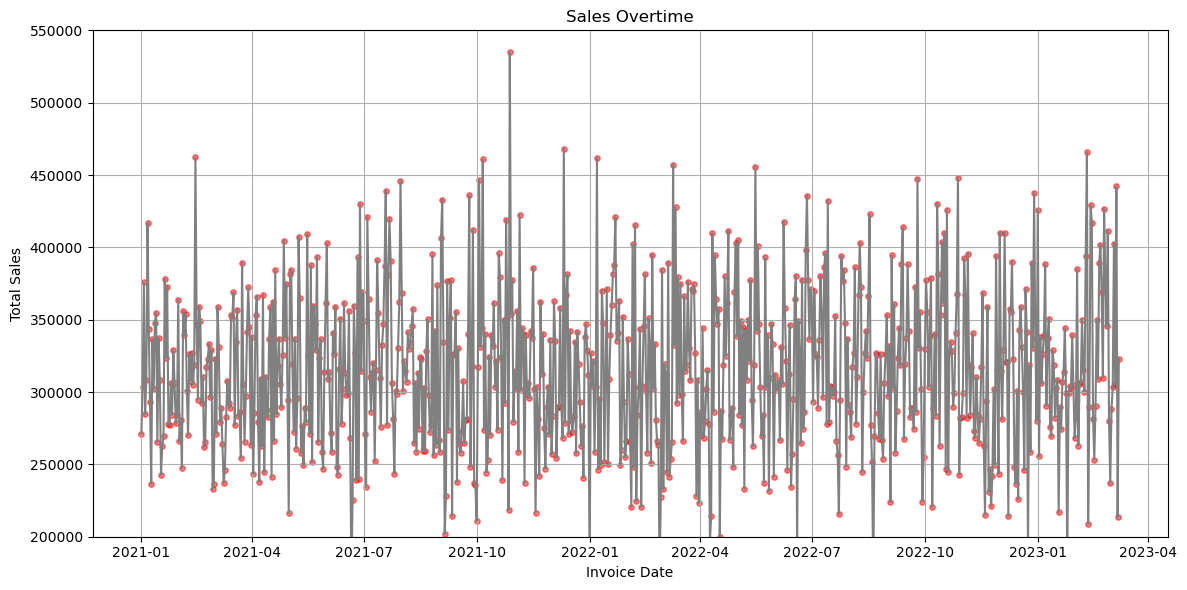

In [24]:
import requests
import matplotlib.pyplot as plt

invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'], format='%d/%m/%Y') #converts string into a real time object

label = invoice_df.groupby('invoice_date')['sale_value'].sum() #groups sale based on invoice date

plt.figure(figsize=(12,6))
plt.title("Sales Overtime")
plt.xlabel("Invoice Date") 
plt.ylabel("Total Sales") #this would measure which invoice date has the most sales
plt.ylim(200000, 550000) #sets limit
plt.yticks(range(200000, 550001, 50000))  # 50k increments
plt.plot(label.index, label.values, color='gray', linestyle='-', linewidth=1.5) #get the lines modified
plt.scatter(label.index, label.values, color='red', s=15,  alpha=0.5) #get the points modified
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#The data in the graph is all over the place or does not follow a specific pattern
#Therefore, there is no seasonal trend or pattern visible

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [16]:
#breakdown of sales include total sales and average sales per decade range per category

#filtering the ages first to round down to nearest _0 place
invoice_df['decade'] = customers_df.set_index(['id'])['age'] // 10 * 10

#filters the NaNs and does not include to pivot table
filtered_df = invoice_df[~invoice_df['decade'].isna()]# ~ inverts the isna() function

#adding decade_range to invoice to categorize certain decades
invoice_df['decade_range'] = invoice_df['decade'].astype(str) + '-' + (invoice_df['decade'] + 9).astype(str)

sales_pivot_table = filtered_df.pivot_table(
    values= 'sale_value',  #values
    index=['category', 'decade_range'], #rows of the table
    aggfunc =['sum', 'mean'], #operations to be done to the values
    fill_value = 0,  #for NaNS to become 0 and not be counted
)

print(sales_pivot_table)

                             sum        mean
                      sale_value  sale_value
category decade_range                       
Books    10.0-19.0        515.10  171.700000
         20.0-29.0       3045.15  169.175000
         30.0-39.0       5287.35  176.245000
         40.0-49.0       4984.35  207.681250
         50.0-59.0       2196.75  146.450000
...                          ...         ...
Toys     40.0-49.0      15267.84  372.386341
         50.0-59.0      15232.00  331.130435
         60.0-69.0      20392.96  392.172308
         70.0-79.0      10787.84  449.493333
         80.0-89.0       8494.08  424.704000

[64 rows x 2 columns]
